In [495]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer

pd.set_option("display.max_columns", 100)

In [496]:
train_features = pd.read_csv("training_value_set.csv", index_col="id")
train_labels = pd.read_csv("training_label_set.csv", index_col="id")
test_features = pd.read_csv("test_value_set.csv", index_col="id")

In [497]:
train_features['public_meeting'] = train_features['public_meeting'].replace({True: 1, False: 0})
train_features['permit'] = train_features['permit'].replace({True: 1, False: 0})

In [498]:
print(train_features.shape, train_labels.shape,test_features.shape)

(59400, 39) (59400, 1) (14850, 39)


In [508]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [505]:
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")
df = pd.merge(train_features, train_labels, left_index=True, right_index=True)

In [510]:
# matrix_train = pps.matrix(train_features) 
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

KeyError: "['status_group', 'funder'] not in index"

In [511]:
matrix_train = pps.matrix(df) 

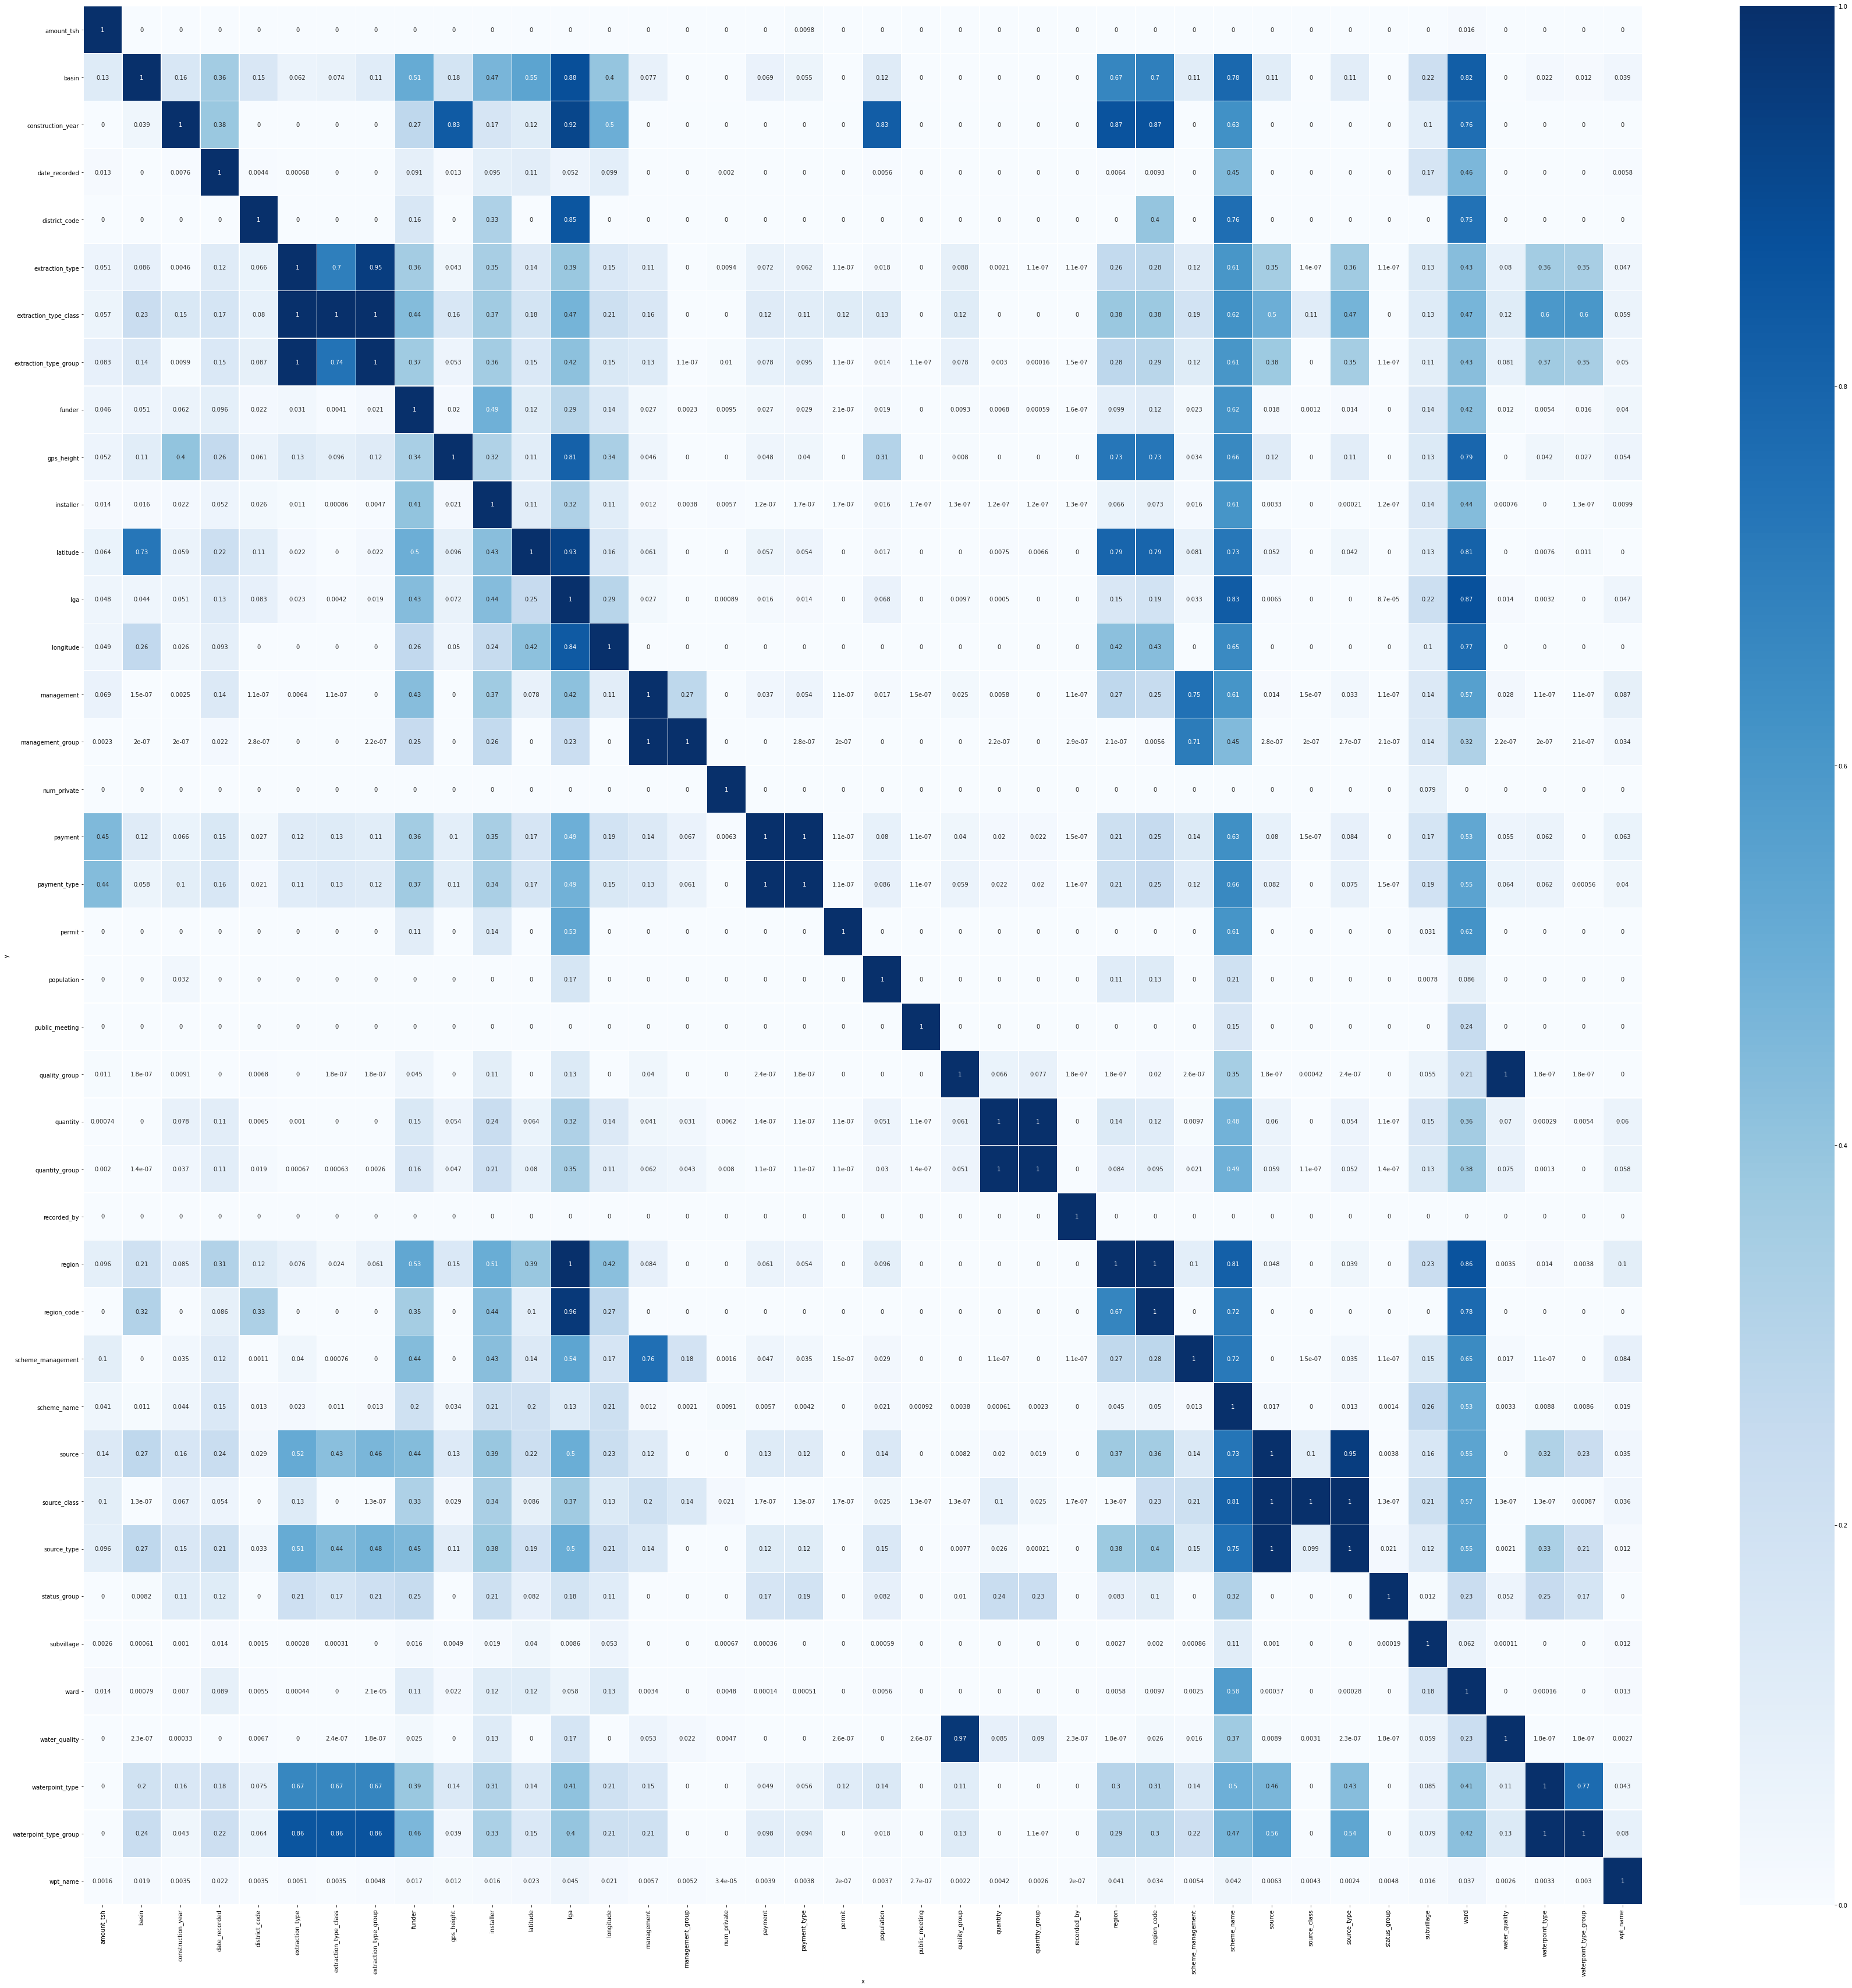

In [517]:
matrix_df = matrix_train[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize = (60,60))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True )

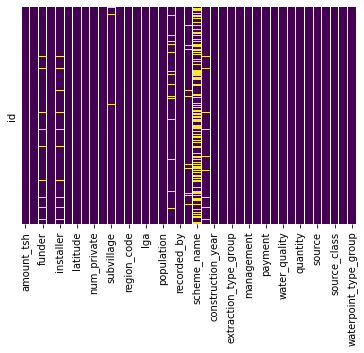

In [434]:
sns.heatmap(train_features.isnull(), yticklabels=False, cbar=False, cmap='viridis')

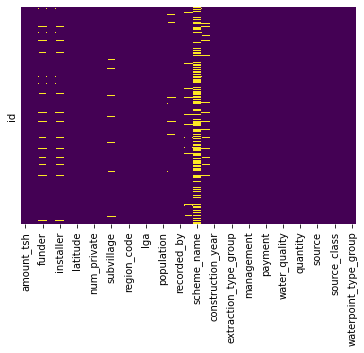

In [435]:
sns.heatmap(test_features.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [436]:
def nullInfo(data):
    columns = data.columns.tolist()
    col_sums = (data.isnull().sum()).to_list()
    col_per = (data.isnull().mean().round(5)*100).to_list()
    col_nquniue = data.nunique().to_list()
    col_datatypes  = (data.dtypes).to_list()
    nullDf = pd.DataFrame(
        {'colName': columns,
         'dataType': col_datatypes,
         'uniqueEntries':col_nquniue,
         'nullEntries': col_sums,
         'nullPercentage': col_per
        })
    return nullDf

In [437]:
def dropColumns(data,colArr=[],per=101,names=False):
    columns = data.columns.tolist()
    col_per = (data.isnull().mean().round(5)*100).to_list()
    additionalCols = [columns[i] for i,val in enumerate(col_per) if val > per]
    
    dropCols = list(set( colArr + additionalCols )) 
    if names:
        return dropCols
    else:
        data.drop(columns=dropCols,inplace=True)
    

In [392]:
train_features.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [360]:
train_features['extraction_info'] = train_features[['extraction_type','extraction_type_group','extraction_type_class']].apply(lambda x: ''.join(x), axis=1)
test_features['extraction_info'] = test_features[['extraction_type','extraction_type_group','extraction_type_class']].apply(lambda x: ''.join(x), axis=1)
train_features['source_info'] = train_features[['source', 'source_type','source_class']].apply(lambda x: ''.join(x), axis=1)
test_features['source_info'] = test_features[['source', 'source_type','source_class']].apply(lambda x: ''.join(x), axis=1)

In [307]:
colArr = ['date_recorded','recorded_by','longitude','latitude','source', 'source_type','source_class','extraction_type','extraction_type_group','extraction_type_class']
dropColumns(train_features,colArr=colArr,per=10,names=False)
dropColumns(test_features,colArr=colArr,per=10,names=False)

In [393]:
nullTrain = nullInfo(train_features)

In [394]:
nullTest = nullInfo(test_features)

In [438]:
def nullInfoCompare(train,test):
    columns = train.columns.tolist()
    col_datatypes  = (train.dtypes).to_list()
    
    col_per = (train.isnull().mean().round(5)*100).to_list()
    col_per_test = (test.isnull().mean().round(5)*100).to_list()
    
    col_nquniue = train.nunique().to_list()
    col_nquniue_test = test.nunique().to_list()
    
    nullDf = pd.DataFrame(
        {'colName': columns,
         'dataType': col_datatypes,
         'uniqueEntriesTrain':col_nquniue,         
         'uniqueEntriesTest':col_nquniue_test,
         'nullPercentageTrain': col_per,
         'nullPercentageTest': col_per_test
        })
    
    return nullDf

In [439]:
nullInfoCompare(train_features,test_features)

,colName,dataType,uniqueEntriesTrain,uniqueEntriesTest,nullPercentageTrain,nullPercentageTest
0,amount_tsh,float64,98,68,0.000,0.000
1,date_recorded,object,356,331,0.000,0.000
2,funder,object,1897,980,6.120,5.852
3,gps_height,int64,2428,2157,0.000,0.000
4,installer,object,2145,1091,6.153,5.906
5,longitude,float64,57516,14390,0.000,0.000
6,latitude,float64,57517,14390,0.000,0.000
7,wpt_name,object,37400,10840,0.000,0.000
8,num_private,int64,65,36,0.000,0.000
9,basin,object,9,9,0.000,0.000


In [397]:
cat_columns = train_features.select_dtypes(include=['object']).columns.to_list()
for col in cat_columns:
#     if train_features[col].nunique() >= 20:
        train_features[col] = train_features[col].astype('category')
        train_features[col] = train_features[col].cat.codes
        test_features[col] = test_features[col].astype('category')
        test_features[col] = test_features[col].cat.codes

In [467]:
train_features.head(7)

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1.0,VWC,0.0,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,1.0,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1.0,VWC,1.0,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1.0,VWC,1.0,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1.0,NaN,1.0,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,1.0,VWC,1.0,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,1.0,VWC,1.0,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [469]:
df = pd.merge(train_features, train_labels, left_index=True, right_index=True)

In [482]:
(df[df['status_group'] == 'functional']['amount_tsh'] == 0).sum()

19706

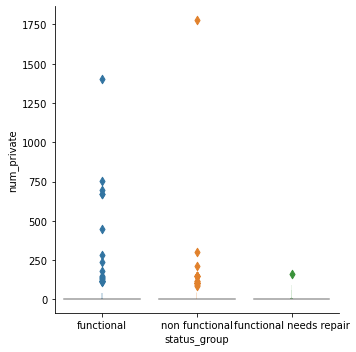

In [483]:
sns.catplot(x="status_group", y="num_private",kind="boxen",data=df);

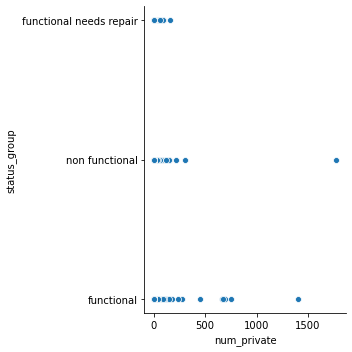

In [485]:
sns.relplot(x="", y="num_private",  data=df);

In [470]:
df.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [400]:
nullInfoCompare(train_features,test_features)

,colName,dataType,uniqueEntriesTrain,uniqueEntriesTest,nullPercentageTrain,nullPercentageTest
0,amount_tsh,float64,98,68,0.000,0.000
1,date_recorded,object,356,331,0.000,0.000
2,funder,object,1897,980,6.120,5.852
3,gps_height,int64,2428,2157,0.000,0.000
4,installer,object,2145,1091,6.153,5.906
5,longitude,float64,57516,14390,0.000,0.000
6,latitude,float64,57517,14390,0.000,0.000
7,wpt_name,object,37400,10840,0.000,0.000
8,num_private,int64,65,36,0.000,0.000
9,basin,object,9,9,0.000,0.000


In [445]:
all_features = pd.concat([train_features,test_features])

In [446]:
all_features.shape

(74250, 36)

In [447]:
nullInfoCompare(train_features,all_features)

,colName,dataType,uniqueEntriesTrain,uniqueEntriesTest,nullPercentageTrain,nullPercentageTest
0,amount_tsh,float64,98,102,0.000,0.000
1,funder,object,1897,2140,6.120,6.066
2,gps_height,int64,2428,2456,0.000,0.000
3,installer,object,2145,2410,6.153,6.104
4,longitude,float64,57516,71870,0.000,0.000
5,latitude,float64,57517,71869,0.000,0.000
6,wpt_name,object,37400,45684,0.000,0.000
7,num_private,int64,65,68,0.000,0.000
8,basin,object,9,9,0.000,0.000
9,subvillage,object,19287,21425,0.625,0.633


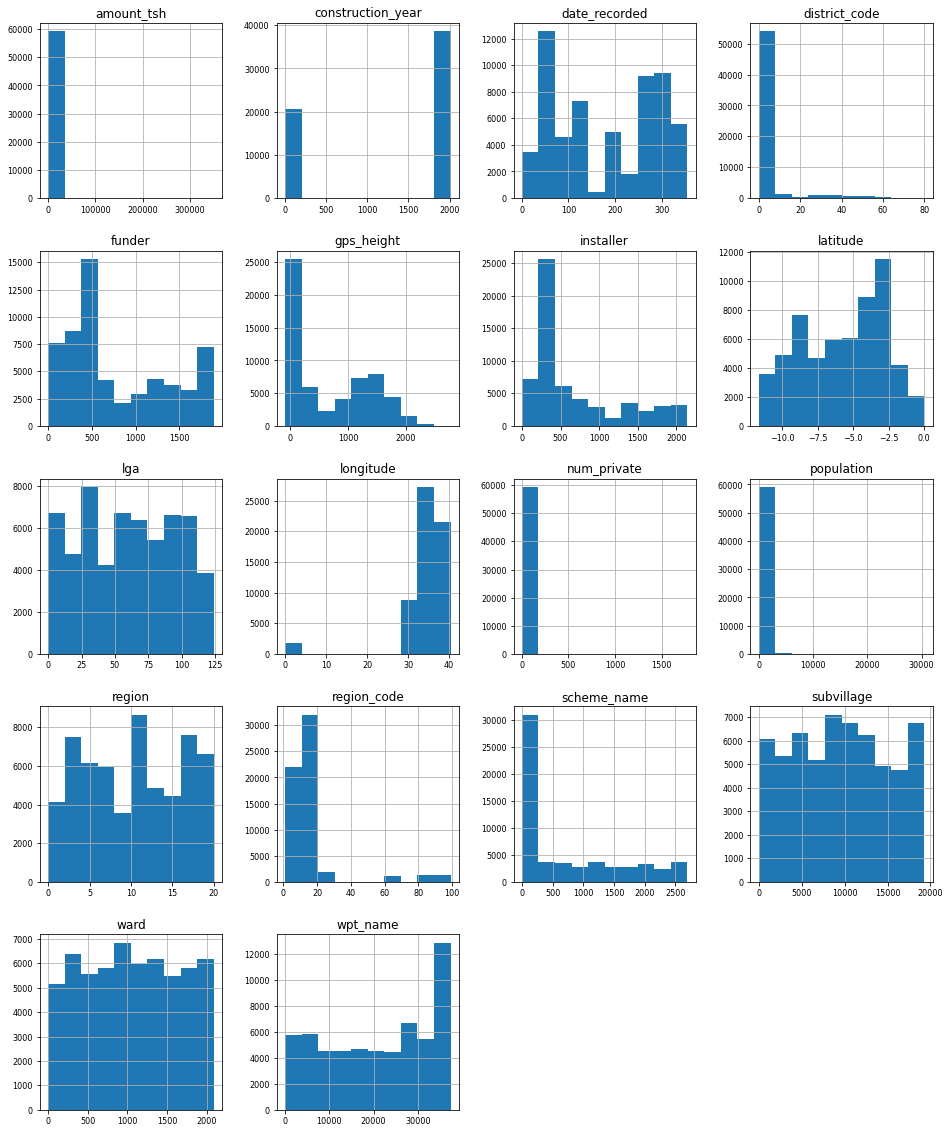

In [369]:
train_features.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8);

In [401]:
corr = train_features.corr()

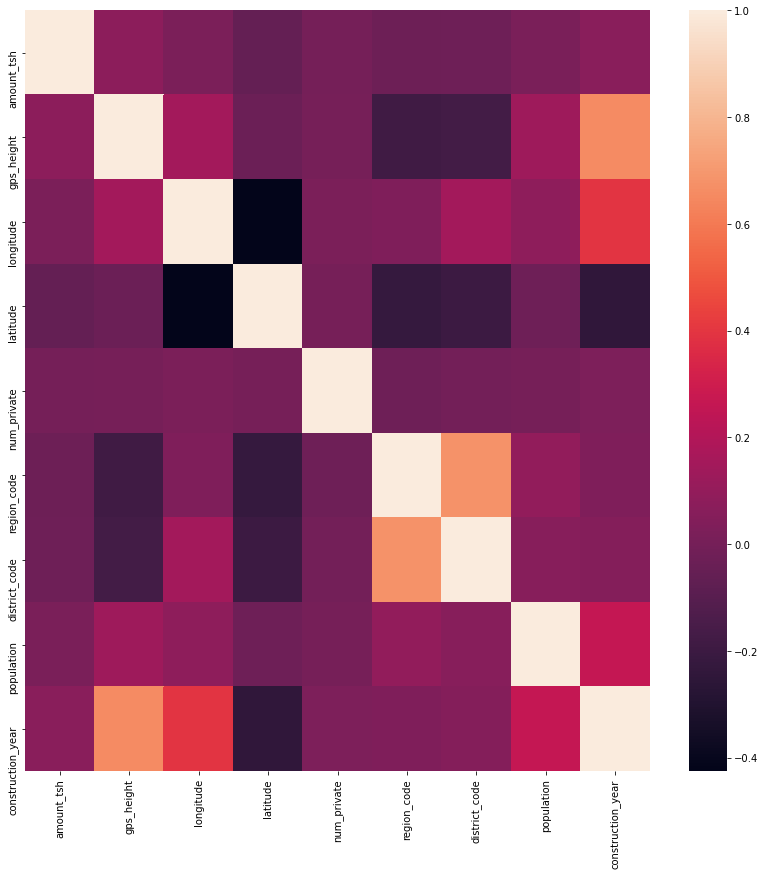

In [402]:
fig, ax = plt.subplots(figsize=(14,14)) 
sns.heatmap(corr)

In [489]:
colArr = ['date_recorded','recorded_by']
dropColumns(train_features,colArr=colArr,per=10,names=False)
dropColumns(test_features,colArr=colArr,per=10,names=False)

In [453]:
all_features = pd.concat([train_features,test_features])

In [454]:
numeric_cols = train_features.columns[train_features.dtypes != "object"].values
object_cols = train_features.columns[train_features.dtypes == "object"].values

object_cols_bin
object_cols_one
object_cols_ord 

numeric_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinalEncode', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps,numeric_cols),
        ("categorical", categorical_transformer,object_cols),
    ])

pipe  = Pipeline([
            ("preprocessor", preprocessor),
             ] ) 

pipe.fit(all_features)

train_features_trans = pipe.transform(train_features)
test_features_trans = pipe.transform(test_features)


array([[1.71428571e-02, 5.16219044e-01, 8.65979069e-01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 5.19358214e-01, 8.60047095e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.14285714e-05, 2.70666202e-01, 9.28503785e-01, ...,
        1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 3.13916986e-02, 8.43150930e-01, ...,
        0.00000000e+00, 4.00000000e+00, 3.00000000e+00],
       [0.00000000e+00, 3.13916986e-02, 8.88862156e-01, ...,
        0.00000000e+00, 4.00000000e+00, 3.00000000e+00],
       [0.00000000e+00, 9.80118591e-02, 9.44450759e-01, ...,
        0.00000000e+00, 4.00000000e+00, 3.00000000e+00]])

In [464]:
rf_classifier = RandomForestClassifier(n_estimators=200,max_depth=1000, random_state=0,n_jobs=5)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
accuracy_score(y_test, rf_predictions)

<ipython-input-464-3b0b73d60d4f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


0.8098765432098766

In [490]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split 
  
X = train_features
y = train_labels 

# X = train_features_trans
# y = train_labels 

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    shuffle=True,
    stratify=y,
    random_state=27) 


In [492]:
!pip install catboost

  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=2d6caa44544d6b5f8a5533d9a3f6c91e53c3305dc1c8ef9084e69dc9ac5e4759
  Stored in directory: c:\users\kumar\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [494]:
from catboost import CatBoostClassifier
rf_classifier =CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
accuracy_score(y_test, rf_predictions)



CatBoostError: Bad value for num_feature[non_default_doc_idx=1,feature_idx=1]="Concern World Wide": Cannot convert 'b'Concern World Wide'' to float

In [442]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline, make_pipeline    
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler,MaxAbsScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer

rf_classifier = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=27,n_jobs=5)


numeric_cols = train_features.columns[train_features.dtypes != "object"].values
object_cols = train_features.columns[train_features.dtypes == "object"].values

numeric_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinalEncode', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps,numeric_cols),
        ("categorical", categorical_transformer,object_cols),
    ])

pipe  = Pipeline([
            ("preprocessor", preprocessor),
            ('clf', rf_classifier)
             ] ) 

In [443]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard_scaler',
                                                                   MinMaxScaler())]),
                                                  array(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'public_meeting',
       'permit', 'construction_year'], dtype=object)),
                                                 ('categorical',
                                                  Pipe...
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'], dtype=object))])),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=5,
                                        random_state=27))])

In [444]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test) 
print('Confusion matrix',confusion_matrix(y_test, pred))    
print('Accuracy', accuracy_score(y_test, pred)) 

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


ValueError: Found unknown categories ['Usambala Sister', 'Kkkt Ndrumangeni', 'Veo', 'Tanzaling', 'Ms-danish', 'Maju Mugumu', 'Kanisa La Tag', 'Haruna Mpog', 'Kauzeni', 'Bgssws', 'Majengo Prima', 'Rotary Club Kitchener', 'Rc Njoro', 'Rajab Seleman', 'Oda', 'Magu Food Security', 'Unice/ Cspd', 'Matogoro', 'Bakari Chimkube', 'Simba Lodge', 'Unicet', 'Drdp', 'Dsdp', 'Wwf / Fores', "Oak'zion' And Bugango B' Commu", 'Netherla', 'Owner Pingo C', 'Paffect Mwanaindi', 'Abdul', 'S.S Mohamed', 'Sakwidi', 'Manyota Primary School', 'Town Council', 'Village Council/ Rose Kawala', 'O', 'Mow', 'Juma', 'Mh.Chiza', 'Rc/dwe', 'Teresa Munyama', 'Mungaya', 'Rajabu Athumani', 'Nyanza Road', 'Tkc', 'Hashi', 'Diocese Of Mount Kilimanjaro', 'Zaburi And Neig', 'Norad/rudep', 'Vwcvwc', 'Village Res', 'Makombo', 'Arabi', 'Said Salum Ally', 'Ardhi Instute', 'Qwick Win', 'Kigoma Municipal Council', 'Brad', 'Government/tcrs', 'Robert Kampala', 'Dwe/anglican Church', 'Kanisani', 'Tingatinga Sec School', 'Gerald Tuseko Gro', 'Mnyama', 'Rashid Mahongwe', 'Neemia Mission', 'Norplan', 'Kanamama', 'Tlc/emmanuel Kasoga', 'Trc', 'World Vision/rc Church', 'Kipo Potry', 'Arab Community', 'Chuo', 'Hasawa', 'Shule Ya Msingi Ufala', 'Rc Msufi', 'Mafwimbo', 'Frankfurt', 'Seleman Rashid', 'Mkurugenzi', 'Quick Win', 'Hasnein Muij Mbunge', 'Tasaf 1', 'Timothy Shindika', 'Marumbo Community', 'Manyovu Agriculture Institute', 'Kamama', 'Minjingu', 'Ras', 'Investor', 'Lusajo', 'Tasaf And Mmem', 'Rashid', 'Bingo Foundation Germany', 'Dasiip', 'Rudep /dwe', 'Ermua', 'Eung Am Methodist Church', 'Egypt Technical Co Operation', 'Simango Kihengu', 'Twice', 'Esawa', 'Enyuati', 'Resolute Golden Pride Project', 'Mbuzi Mawe', 'Village Water Commission', 'Chacha Issame', 'Luchelegu Primary School', 'Htm', 'Lions Club Kilimanjaro', 'Da Unoperaio Siciliano', 'Rudri', 'Dqnida', 'Kinga', 'Selikali Ya Kijiji', 'Pag Church', 'Loocip', 'Kome Parish', 'Saidi Halfani', 'Mazaro Kabula', 'Craelius', 'Orphanage', 'H4ccp', 'Morad', 'Simav', 'Tlc/community', 'Korea', 'Community Bank', 'Rotaty Club', 'Nyamingu Subvillage', 'Tansi', 'Mkulima', 'Moshono Adp', 'Doner And Com', 'Kilimarondo Parish', 'Hapa Singida', 'Jacobin', 'Lotary International', 'Mwinjuma Mzee', 'Cvs Miss', 'Tcrs/care', 'Sw', 'Vn', 'Eastmeru Medium School', 'Sister Makulata', 'Daldo', 'Seleman Seif', 'Comune Di Roma', 'Twig', 'Kfw', 'Resolute Mininggolden Pride', 'Dasp Ltd', 'Ddca', 'Batist Church', 'Ncs', 'Mzee Waziri Tajari', 'Hasnein Murij', 'Tacri', 'Mwalimu Muhenza', 'Kopwe Khalifa', 'Opec', 'Ramsar', 'St Magreth Church', 'C', 'Eater', 'Caltaz Kahama', 'Msiki', 'Dmk Anglican', 'Maliasili', 'Kindoroko Water Project', 'Babtest', 'Kiwanda Cha Ngozi', 'Meko Balo', 'Samsoni', 'Maerere', 'Dwsdp', 'Bukwang Church Saint', 'Rwi', 'If', 'Sido', 'Panone', 'Ilo/undp', 'Chani', 'Kikundi Cha Akina Mama', 'Doner And Ded', 'Kondela', 'Stantons', 'Africa Project Ev Germany', 'Friedkin Conservation Fund', 'Mgaya Masese', 'Singsinga', 'Kahema', 'Pdi', 'Haidomu Lutheran Church', 'Dom', 'Sadaqatun Jar', 'Erre Kappa', 'Trach', 'Wilson', 'Njula', 'Wcst', 'Norad/government', 'Babtist', 'Pangadeco', 'Godii', 'Songa Hospi', 'Zao Water Spring X', 'Mayiro', 'Kurrp', 'Oikos E.Africa/ European Union', 'Moses', 'Soko La Magomeni', 'Hotels And Lodge Tanzania', 'Mzee Ngwatu', 'Wahidi', 'Rudep/norad', 'R', 'Tree Ways German', 'Piscope', 'Mzee Lesilali', 'Noshadi', 'Waitaliano', 'Mahemba', 'Mbozi Secondary School', 'Motiba Wambura', 'Muhochi Kissaka', 'Steven Nyangarika', 'Mnyamisi Jumaa', 'Dar Es Salaam Round Table', 'Mgaya', 'Sema S', 'Teonas Wambura', 'Kdc', 'Mbwiro', 'In Memoria Di Albeto', 'Domestic Rural Development Pr', 'German Missionary', 'Tlc/nyengesa Masanja', 'Yasini Selemani', 'Richard M.Kyore', 'Nyabweta', 'Buptist', 'Getekwe', 'Game Division', 'Kamata Project', 'Ngelepo Group', 'Prince Medium School', 'Makanga', 'Wug And Ded', 'Tanedaps Society', 'Shear Muslim', 'Morrovian', 'International Aid Services', 'Kwa Ditriki Cho', 'Samweli', 'Swifti', 'Lion Clu', 'Wafidhi Wa Ziwa T', 'Tcrs/village Community', 'Vifaf', 'Unicef/african Muslim Agency', 'Dadid', 'Irevea Sister Water', 'Afric', 'Pentecosta Seela', 'Cathoric', 'Mfuko Wa Jimbo', 'Peter Ngereka', 'Madaraweshi', 'Tlc/jenus Malecha', 'Pentecostal Hagana Sweeden', 'Yasi Naini', 'Tanzania Egypt Technical Co Op', 'Isf / Tasaff', 'Ilwilo Community', 'Marafin', 'Masai Land', 'Marke', 'Ldcgd', 'Saudia', 'Fosecu', 'Private Individul', 'Uniceg', 'Bukwang Church Saints', 'Farm-africa', 'Mwakalinga', 'Wdsp', 'Shanta', 'Ur', 'Peter Mayiro', 'Msikitini', 'Muslim World', 'Water Authority', 'Mwalimu Omari', 'Vwcvc', 'Ju', 'Muniko', 'Mwita Lucas', 'Villagers Mpi', 'Nginila', 'Kassim', 'Tasae', 'Kenyans Company', 'Bao', 'Municipal Council', 'Kilimo', 'Tasaf Ii', 'African Reflections Foundation', 'Tgrs', 'Matata Selemani', 'Pwc', 'Tredsp', 'Overnment', 'Igolola Community', 'Mama Ku', 'Rv', 'Compasion International', 'Masista', 'Norad/japan', 'Hassan Gulam', 'Methodist Church'] in column 0 during transform

In [289]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.neural_network import MLPClassifier
# clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
# clf2 = RandomForestClassifier(n_estimators=200, random_state=1)
# clf3 = RandomForestClassifier(n_estimators=200, random_state=1)
# rf_classifier = clf3

In [292]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
# resampled_X_train, resampled_y_train = sm.fit_resample(X_train, y_train)
# rf_classifier.fit(resampled_X_train, resampled_y_train)
# rf_predictions = rf_classifier.predict(X_test)
# accuracy_score(y_test, rf_predictions)

In [293]:
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [294]:
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

<ipython-input-294-35c2ffc72de0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


In [295]:
confusion_matrix(y_test, rf_predictions)

array([[8653,  241,  784],
       [ 661,  443,  191],
       [1380,  120, 5347]], dtype=int64)

In [296]:
accuracy_score(y_test, rf_predictions) # RF

0.8104938271604938

In [22]:
# df_test_transformed = encoder.transform(test_features_df)
test_probas = rf_classifier.predict(test_features)
test_probas

array(['non functional', 'functional', 'non functional', ...,
       'functional', 'functional', 'non functional'], dtype=object)

In [23]:
submission_df = pd.read_csv("SubmissionFormat.csv", index_col="id")

In [24]:
submission_df.head()

,status_group
id,
50785,predicted label
51630,predicted label
17168,predicted label
45559,predicted label
49871,predicted label


In [26]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["status_group"] = test_probas

submission_df.head()

,status_group
id,
50785,non functional
51630,functional
17168,non functional
45559,non functional
49871,functional


In [27]:
submission_df.to_csv('my_submission.csv', index=True)